<a href="https://colab.research.google.com/github/VictorOmondi1997/visualizing_students_dataset/blob/master/visualizing_students_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# exploring data from students in secondary school. 

We have a lot of information about each student like their age, where they live, their study habits and their extracurricular activities.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/3996/datasets/61e08004fef1a1b02b62620e3cd2533834239c90/student-alcohol-consumption.csv')
df.head()

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


the relationship between the number of absences they have in school and their final grade in the course, segmented by where the student lives (rural vs. urban area).

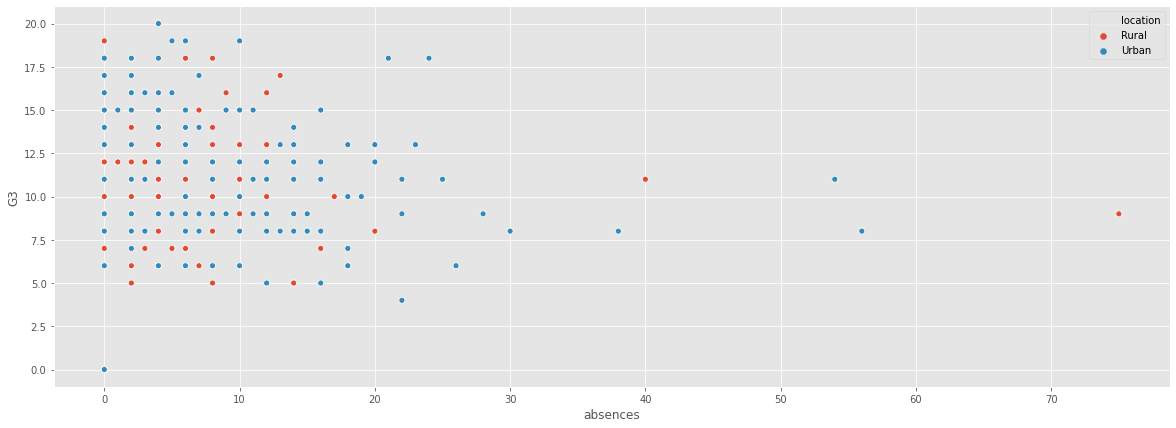

In [4]:
fig, ax = plt.subplots(figsize=(20,7))
sns.scatterplot(x='absences', y='G3', data=df, hue='location', hue_order=['Rural', 'Urban'], ax=ax)
plt.show()

 It looks like students with higher absenses tend to have lower grades in both rural and urban areas.

  How many students live in urban vs. rural areas, and does this vary based on what school the student attends? Let's make a count plot with subgroups to find out.

  The "school" column indicates the initials of which school the student attended - either "GP" or "MS".

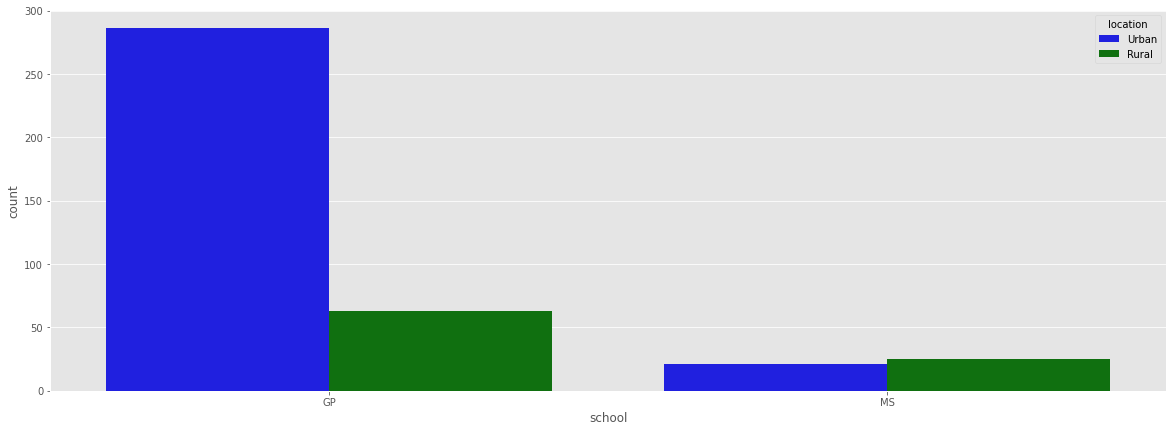

In [5]:
fig, ax = plt.subplots(figsize=(20,7))
sns.countplot(ax=ax,x='school', data=df, hue='location',palette={'Rural':'green', 'Urban':'blue'})
plt.show()

Students at GP tend to come from an urban location, but students at MS are more evenly split.

We've seen that students with more absences (`"absences"`) tend to have lower final grades (`"G3"`). **Does this relationship hold regardless of how much time students study each week?**

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time ("study_time").

# The relationship between the number of asences that a student has in school and their final grade.

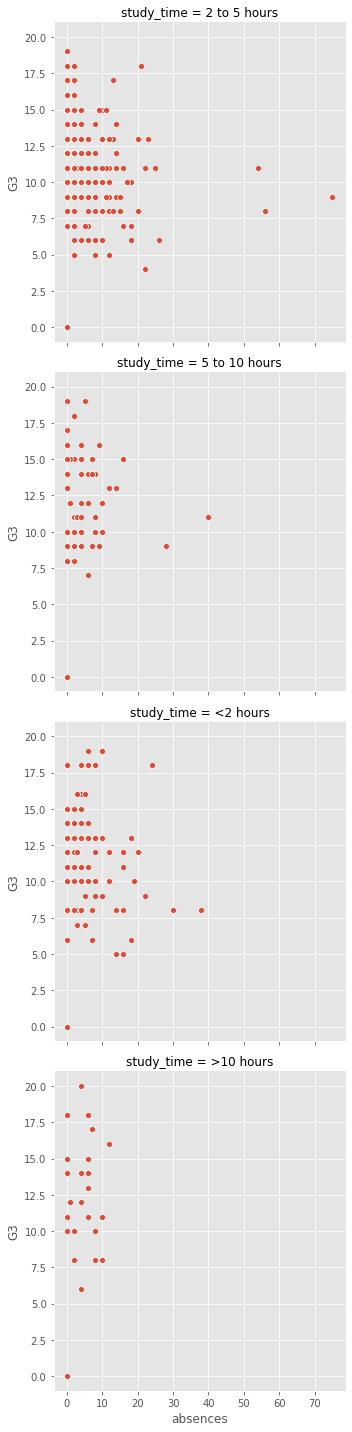

In [9]:
sns.relplot(x='absences', y='G3', data=df, kind='scatter', row='study_time')
plt.show()

does a student's first semester grade (`"G1"`) tend to correlate with their final grade (`"G3"`)?

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school (`"schoolsup"`) or from their family (`"famsup"`), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.

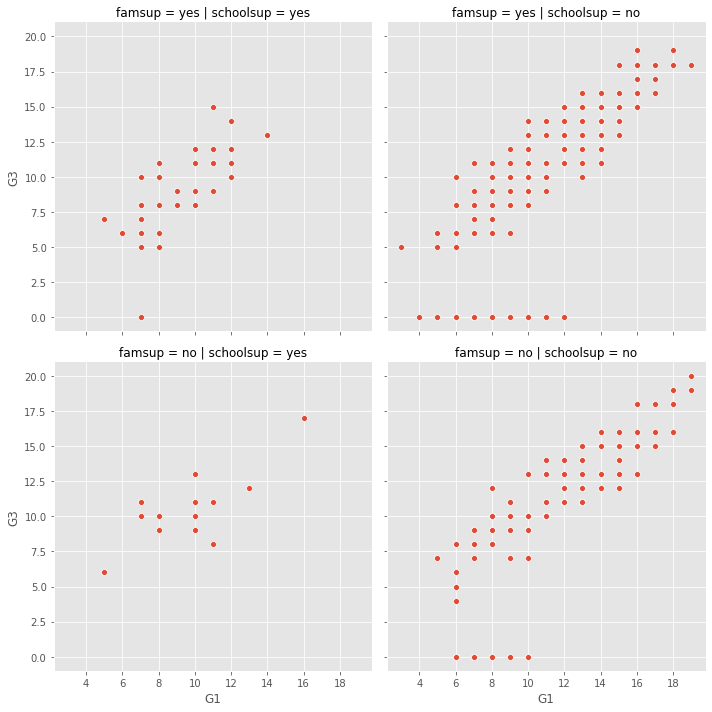

In [13]:
sns.relplot(data=df, kind='scatter', x='G1', y='G3',col='schoolsup', col_order=['yes', 'no'], row='famsup', row_order=['yes', 'no'])
plt.show()

It looks like the first semester grade does correlate with the final grade, regardless of what kind of support the student received.